# PROJETO 2  - Análise Exploratória de Atrasos em Voos

Neste notebook, realizaremos uma análise exploratória do dataset de voos para responder às seguintes perguntas:
1. Qual(s) companhia(s) que mais registram atrasos? Analise qualitativa e quantitativamente.
2. A rota ou aeronave podem influenciar nos atrasos?
3. Existe algum padrão ou tendência nos atrasos? Se sim, o que pode ser feito para reduzi-los?

O dataset utilizado está disponível em: [nycflights.csv](https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv)

# Importação da Base

In [163]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
url = 'https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv'
df = pd.read_csv(url)

print('Data loaded successfully.')

Data loaded successfully.


In [164]:
# Exibir as primeiras linhas para entender a estrutura dos dados
df.head()


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


# Saneamento da BASE

In [165]:
#Informações da Base "Bruto"
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336776 non-null  int64  
 1   year        336776 non-null  int64  
 2   month       336776 non-null  int64  
 3   day         336776 non-null  int64  
 4   dep_time    328521 non-null  float64
 5   dep_delay   328521 non-null  float64
 6   arr_time    328063 non-null  float64
 7   arr_delay   327346 non-null  float64
 8   carrier     336776 non-null  object 
 9   tailnum     334264 non-null  object 
 10  flight      336776 non-null  int64  
 11  origin      336776 non-null  object 
 12  dest        336776 non-null  object 
 13  air_time    327346 non-null  float64
 14  distance    336776 non-null  int64  
 15  hour        328521 non-null  float64
 16  minute      328521 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 43.7+ MB


In [166]:
#Selecionar somente as colunas para analise
usecols=["dep_time","arr_time","carrier","flight","arr_delay", "tailnum","air_time","origin", "dest", "month"]

In [167]:
#Retirando os valores nulos das colunas usadas para analise
df_raw = df.loc[
    (~df["arr_time"].isna()) \
    & (~df["dep_time"].isna()) \
    & (~df["carrier"].isna()) \
    & (~df["flight"].isna())\
    & (~df["dep_delay"].isna())\
    & (~df["origin"].isna())\
    & (~df["dest"].isna())\
     & (~df["arr_delay"].isna())\
    ].loc[:, usecols]

In [169]:
#Verificação das informações da tabela após retirada dos Nulos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_time   327346 non-null  float64
 1   arr_time   327346 non-null  float64
 2   carrier    327346 non-null  object 
 3   flight     327346 non-null  int64  
 4   arr_delay  327346 non-null  float64
 5   tailnum    327346 non-null  object 
 6   air_time   327346 non-null  float64
 7   origin     327346 non-null  object 
 8   dest       327346 non-null  object 
 9   month      327346 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 27.5+ MB


# Análises dos Atrasos

1. Qual(is) companhia(s) que mais registram atrasos? Analise qualitativa e quantitativamente.

    Vamos analisar quais companhias aéreas têm os maiores atrasos médios e quantidade



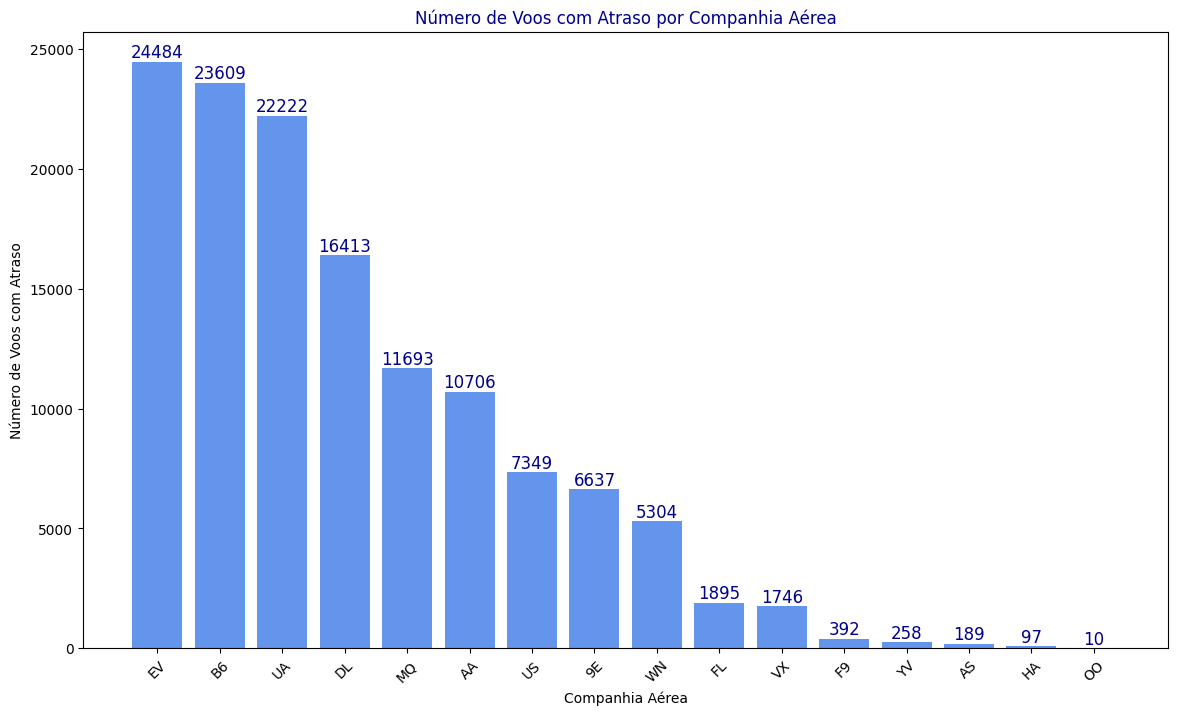

Carrier statistics calculated.


In [170]:
# Agrupar por companhia e calcular o atraso médio, número de voos e número de voos com atraso
carrier_stats = df_raw.groupby('carrier').agg(
    total_flights=('flight', 'count'),
    avg_delay=('arr_delay', 'mean'),
    num_delayed_flights=('arr_delay', lambda x: (x > 0).sum())  # Contar número de voos com atraso
).reset_index()

# Ordenar por número de voos com atraso
carrier_stats = carrier_stats.sort_values(by='num_delayed_flights', ascending=False)

# Visualização: gráfico de barras da quantidade de voos com atraso por companhia
plt.figure(figsize=(14, 8))
bars = plt.bar(carrier_stats['carrier'], carrier_stats['num_delayed_flights'], color='cornflowerblue')

# Adicionar rótulos da quantidade de atrasos no topo de cada barra
for bar in bars:
    yval = bar.get_height()  # Altura da barra
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12, color='darkblue')

plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos com Atraso')
plt.title('Número de Voos com Atraso por Companhia Aérea', color='darkblue')
plt.xticks(rotation=45)
plt.show()

print('Carrier statistics calculated.')

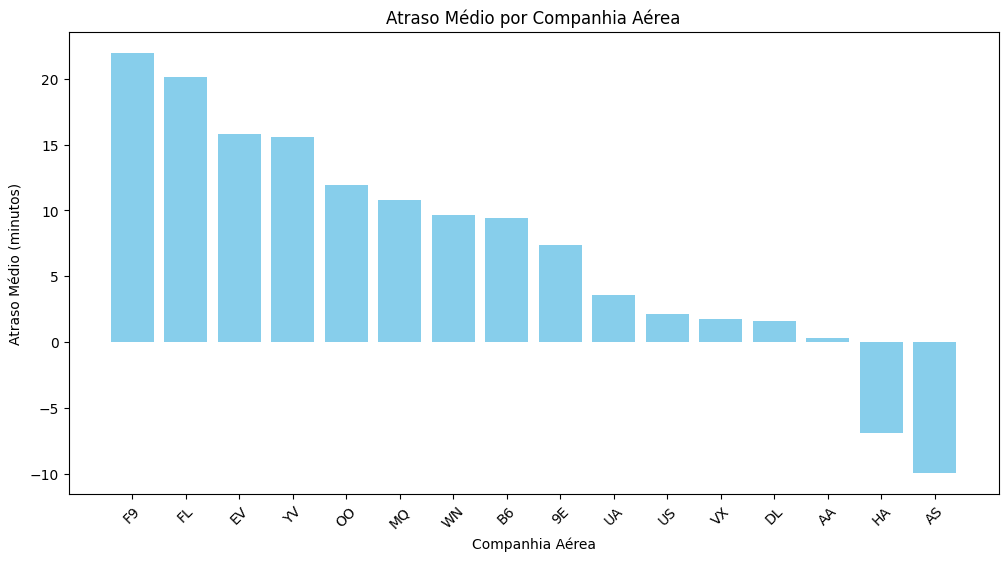

Carrier statistics calculated.


In [171]:
# Agrupar por companhia e calcular o atraso médio e o número de voos
carrier_stats = df_raw.groupby('carrier').agg(
    total_flights=('flight', 'count'),
    avg_delay=('arr_delay', 'mean')
).reset_index()

# Ordenar por atraso médio
carrier_stats = carrier_stats.sort_values(by='avg_delay', ascending=False)

# Visualização: gráfico de barras do atraso médio por companhia
plt.figure(figsize=(12, 6))
plt.bar(carrier_stats['carrier'], carrier_stats['avg_delay'], color='skyblue')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Companhia Aérea')
plt.xticks(rotation=45)
plt.show()

print('Carrier statistics calculated.')

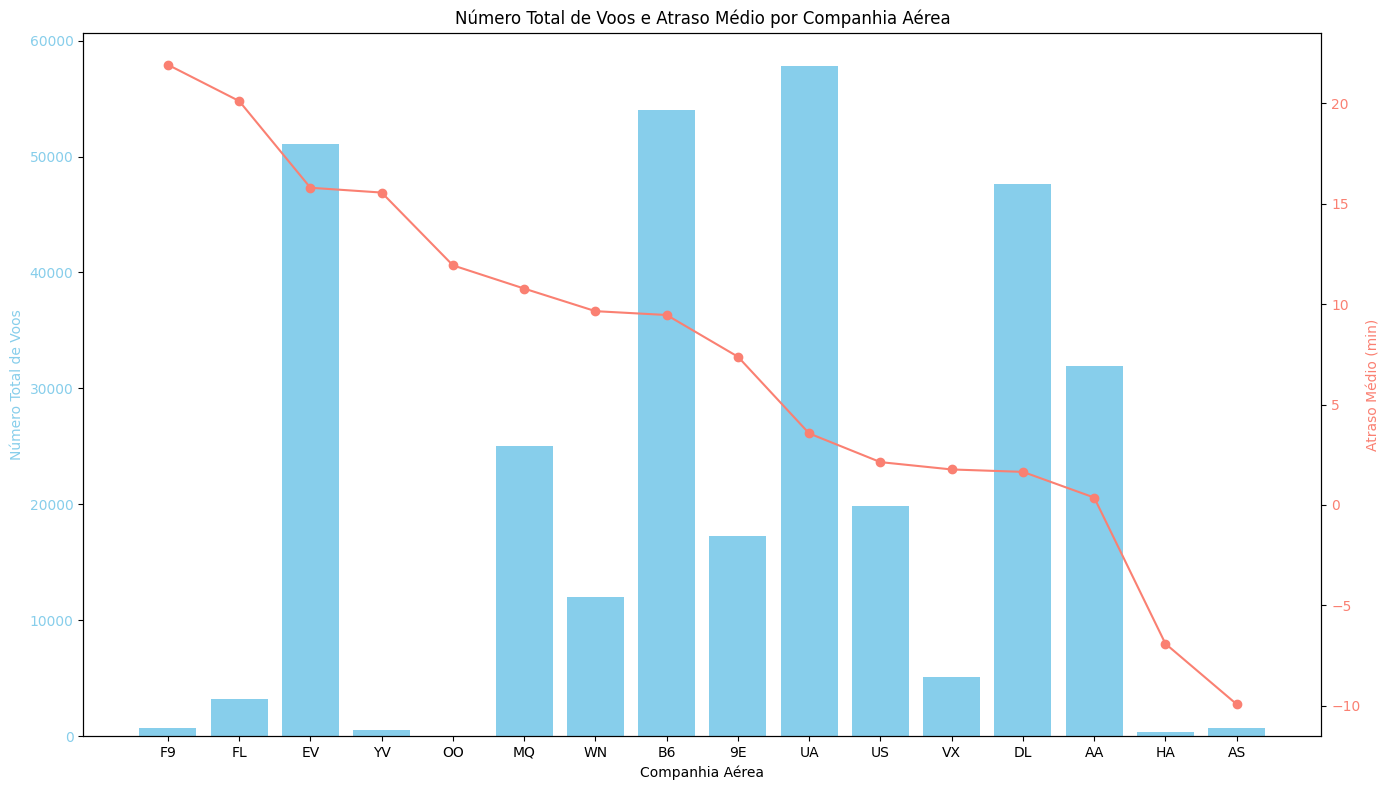

In [172]:
# Agrupar por companhia e calcular o atraso médio e o número total de voos
carrier_stats = df_raw.groupby('carrier').agg(
    total_flights=('flight', 'count'),
    avg_delay=('arr_delay', 'mean')
).reset_index()

# Ordenar por atraso médio (opcional)
carrier_stats = carrier_stats.sort_values(by='avg_delay', ascending=False)

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de barras para o número total de voos
ax1.bar(carrier_stats['carrier'], carrier_stats['total_flights'], color='skyblue', label='Número Total de Voos')
ax1.set_xlabel('Companhia Aérea')
ax1.set_ylabel('Número Total de Voos', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Criar um segundo eixo y para o atraso médio
ax2 = ax1.twinx()
ax2.plot(carrier_stats['carrier'], carrier_stats['avg_delay'], color='salmon', marker='o', label='Atraso Médio (min)')
ax2.set_ylabel('Atraso Médio (min)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Adicionar títulos e legendas
plt.title('Número Total de Voos e Atraso Médio por Companhia Aérea')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Influência da Rota ou Aeronave nos Atrasos

Vamos analisar se a rota ou a aeronave influenciam nos atrasos e visualizar esses dados.

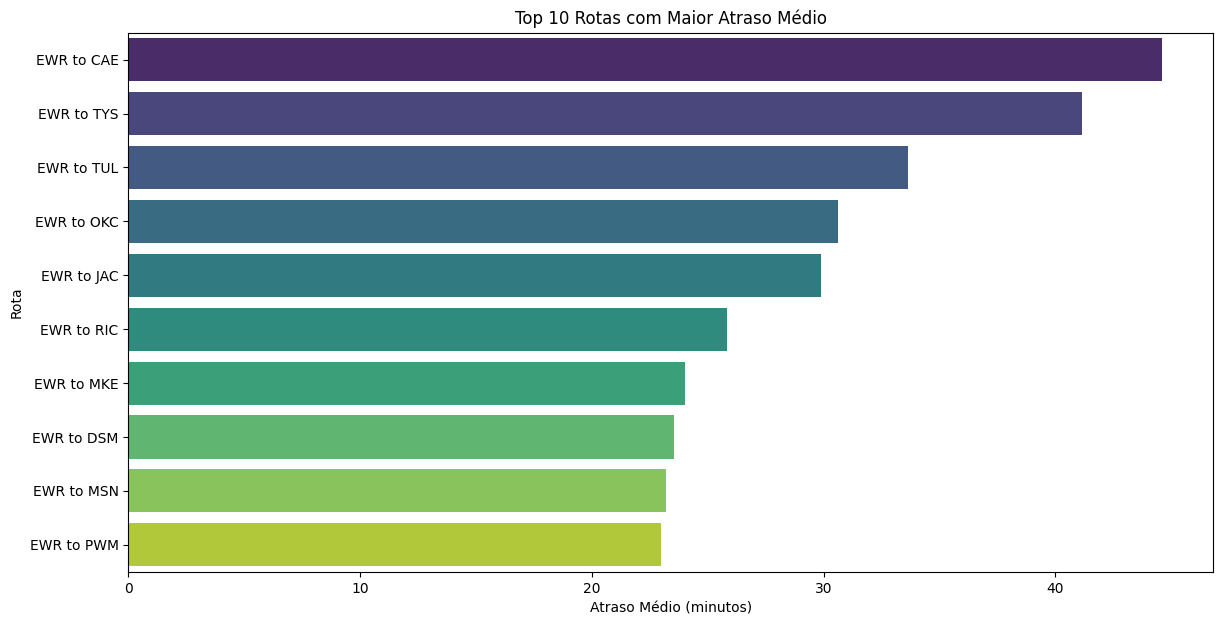

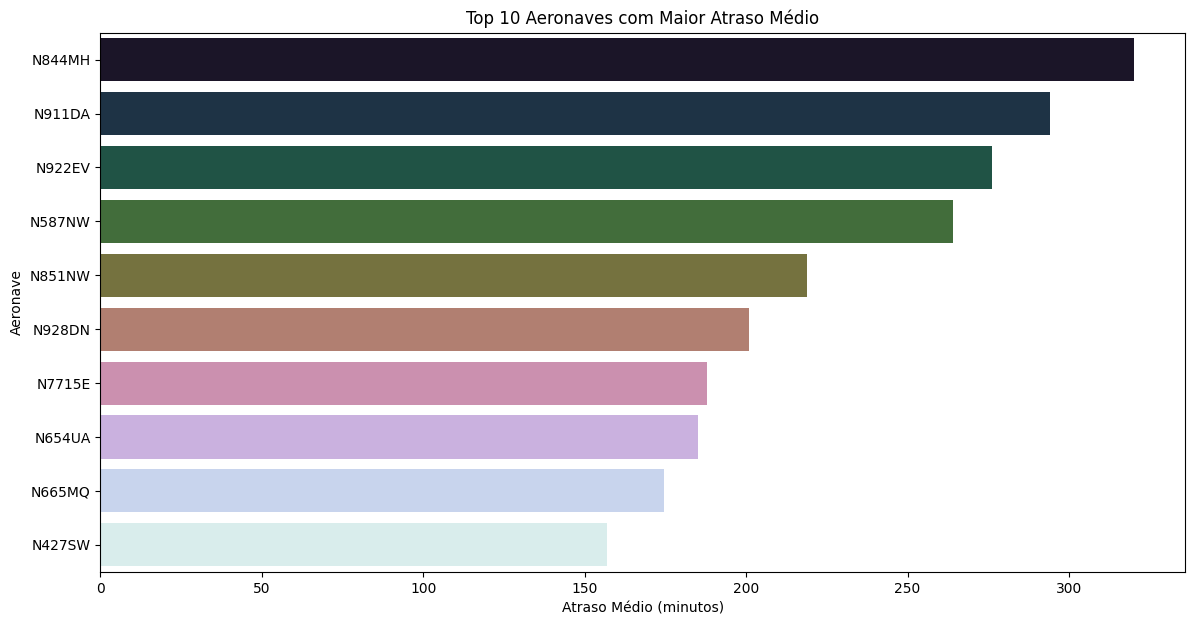

In [173]:
# Calcular o atraso médio por rota
route_delay = df_raw.groupby(['origin', 'dest']).agg(avg_delay=('arr_delay', 'mean')).reset_index()

# Selecionar as top N rotas com maior atraso médio
top_n = 10
top_routes = route_delay.nlargest(top_n, 'avg_delay')

# Criar uma coluna para a rota combinada
top_routes['route'] = top_routes['origin'] + ' to ' + top_routes['dest']

# Visualização: gráfico de barras do atraso médio por top rotas
plt.figure(figsize=(14, 7))
sns.barplot(x='avg_delay', y='route', data=top_routes, palette='viridis', hue='route')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Rota')
plt.title(f'Top {top_n} Rotas com Maior Atraso Médio')
plt.show()

# Calcular o atraso médio por aeronave
aircraft_delay = df_raw.groupby('tailnum').agg(avg_delay=('arr_delay', 'mean')).reset_index()

# Selecionar as top N aeronaves com maior atraso médio
top_aircraft = aircraft_delay.nlargest(top_n, 'avg_delay')

# Visualização: gráfico de barras do atraso médio por top aeronaves
plt.figure(figsize=(14, 7))
sns.barplot(x='avg_delay', y='tailnum', data=top_aircraft, palette='cubehelix', hue='tailnum')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Aeronave')
plt.title(f'Top {top_n} Aeronaves com Maior Atraso Médio')
plt.show()

In [174]:
# Contar o número de localidades
unique_routes = df_raw[['origin', 'dest']].drop_duplicates().shape[0]

# Mostrar o resultado
print(f'Número de localidades: {unique_routes}')

Número de localidades: 223


In [175]:
# Contar o número total de aeronaves
num_aeronaves = df_raw['tailnum'].nunique()

# Mostrar o resultado
print(f'Total de aeronaves: {num_aeronaves}')

Total de aeronaves: 4037


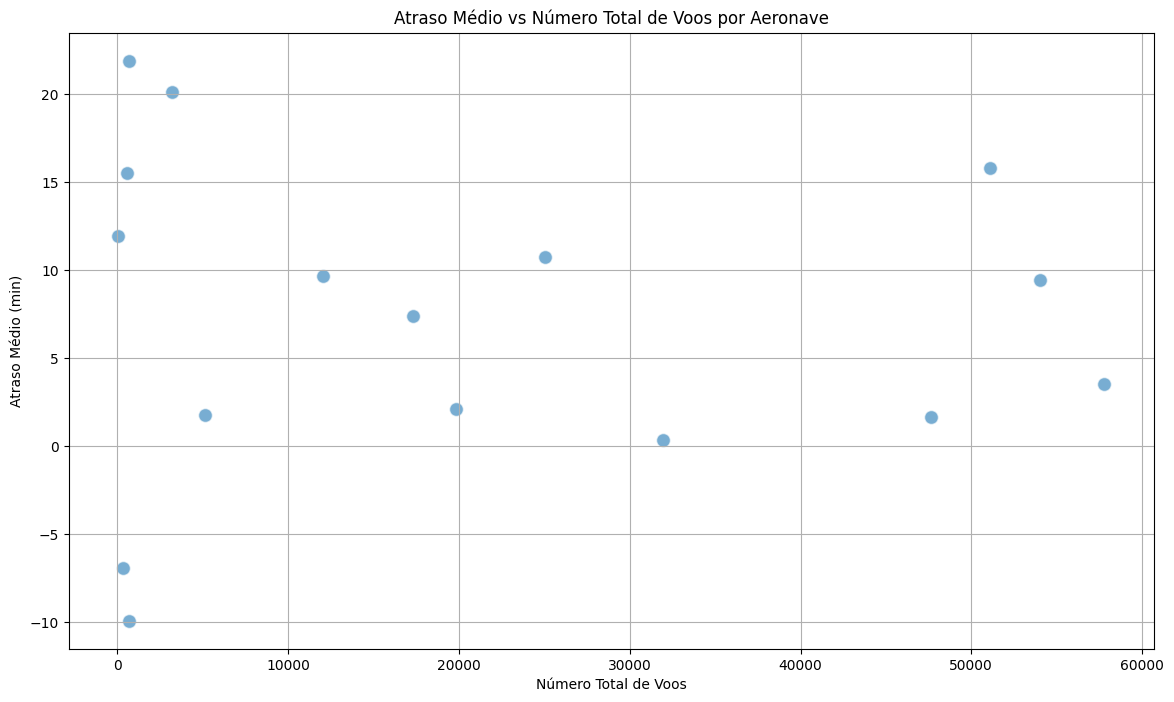

In [176]:
# Ordenar por atraso médio (opcional)
carrier_stats = carrier_stats.sort_values(by='avg_delay', ascending=False)

# Criar o gráfico de dispersão
plt.figure(figsize=(14, 8))
plt.scatter(carrier_stats['total_flights'], carrier_stats['avg_delay'], alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Número Total de Voos')
plt.ylabel('Atraso Médio (min)')
plt.title('Atraso Médio vs Número Total de Voos por Aeronave')
plt.grid(True)
plt.show()

## Identificação de Padrões ou Tendências em Atrasos

Vamos identificar se há padrões ou tendências nos atrasos ao longo do tempo e visualizar esses dados.

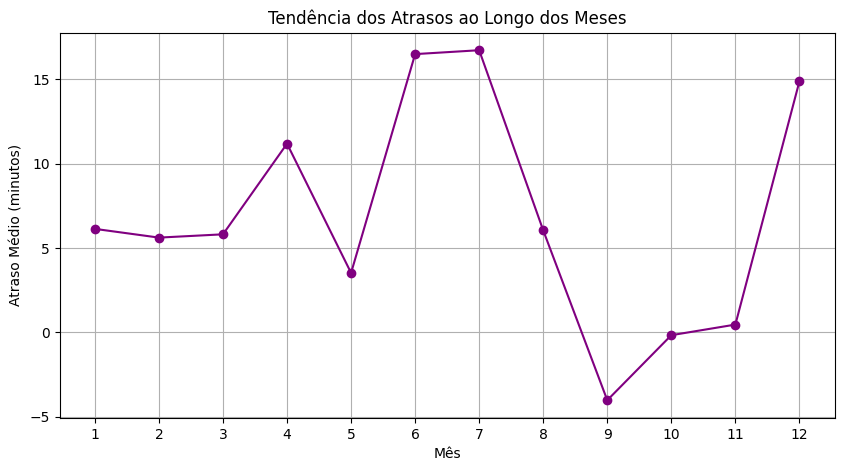

In [177]:
# Análise de atrasos ao longo do mês
monthly_delay = df_raw.groupby('month').agg(avg_delay=('arr_delay', 'mean')).reset_index()

# Visualização: gráfico de linha do atraso médio ao longo dos meses
plt.figure(figsize=(10, 5))
plt.plot(monthly_delay['month'], monthly_delay['avg_delay'], marker='o', color='purple')
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Tendência dos Atrasos ao Longo dos Meses')
plt.xticks(monthly_delay['month'])  # Adiciona os valores do mês no eixo x
plt.grid(True)
plt.show()

..